In [1]:
# importing basic packages
import pandas as pd
import numpy as np

* **Data Pre-processing :**
    * Step 1 : Creating Test, Validation and Train splits
        * Look for % of row split by response variable
        * Correct class imbalance if exists
        * Randomize the dataset and apply split method to create train, validation and test datasets


In [2]:
df_full = pd.read_csv('hand_pump.csv')

In [3]:
df_full.shape

(59400, 42)

In [4]:
df_full.head()

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
# checking for row count per level of response variable
df_full['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [6]:
100*4317/(4317+32259+22824)

7.267676767676767

### Please note :
* We see that the category **"functional needs repair"** is only 7% of total data
* To treat this problem as a "binary classification problem", let's get rid of this category


In [7]:
# creating a reduced dataset by removing rows containing the class = "functional needs repair"
df_redc = df_full[df_full['status_group'] != 'functional needs repair']

In [8]:
df_redc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55083 entries, 0 to 59399
Data columns (total 42 columns):
Unnamed: 0               55083 non-null int64
id                       55083 non-null int64
amount_tsh               55083 non-null float64
date_recorded            55083 non-null object
funder                   51885 non-null object
gps_height               55083 non-null int64
installer                51868 non-null object
longitude                55083 non-null float64
latitude                 55083 non-null float64
wpt_name                 55083 non-null object
num_private              55083 non-null int64
basin                    55083 non-null object
subvillage               54713 non-null object
region                   55083 non-null object
region_code              55083 non-null int64
district_code            55083 non-null int64
lga                      55083 non-null object
ward                     55083 non-null object
population               55083 non-null int64
pu

In [9]:
df_redc.isnull().sum().sort_values(ascending=False)

scheme_name              26162
scheme_management         3654
installer                 3215
funder                    3198
public_meeting            3178
permit                    2756
subvillage                 370
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
status_group                 0
basin                        0
population                   0
wpt_name                     0
latitude                     0
longitude                    0
gps_height                   0
date_recorded                0
amount_tsh                   0
id                           0
num_private                  0
recorded_by                  0
waterpoint_type_group        0
construction_year            0
waterpoint_type              0
source_class                 0
source_type                  0
source                       0
quantity_group               0
quantity                     0
quality_

In [10]:
df_redc.shape

(55083, 42)

### Next Step :
* Now, since the dataset consists of only two classes, let's check the class imbalance scenario

In [11]:
train = df_redc

In [12]:
train.status_group.value_counts()

functional        32259
non functional    22824
Name: status_group, dtype: int64

##### There are several columns with missing data. All are categorical
##### scheme name column has almost 50% data missing. Hence, we drop it

In [13]:
train = train.drop('scheme_name',axis = 1)

Feature selection

In [14]:
# selecting all categorical features
feature_cols = train.select_dtypes(include=['object']).columns

In [15]:
# selecting all numeric features
num_cols = train.select_dtypes(include = ['int64','float64']).columns

In [16]:
print(len(feature_cols))
print(len(num_cols))

30
11


Let's do a bit of feature engineering and create a column called age (age of the pump since construction)

In [17]:
train.date_recorded.head() # date where the details of the waterpump were recorded

0    2011-03-14
1    2013-03-06
2    2013-02-25
3    2013-01-28
4    2011-07-13
Name: date_recorded, dtype: object

In [19]:
train['year_recorded'] = train['date_recorded'].apply(lambda x: int(x.strip().split('-')[0]))

In [20]:
train['handpump_age'] = train['year_recorded'] - train['construction_year']
train.head(100)

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,handpump_age
0,0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,12
1,1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3
2,2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,4
3,3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,27
4,4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,108,74246,50.0,2011-03-07,Ruthe,1428,Ruthe,35.630481,-7.710549,none,...,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,2011,11
109,109,7116,0.0,2011-07-12,NaN,0,NaN,33.805081,-9.130674,Kwa Mzee Kaiga,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,2011,2011
110,110,64063,0.0,2013-05-03,Adra,1295,Adra/Community,36.908329,-3.330743,Lukumai,...,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional,2013,9
111,111,59983,0.0,2013-07-03,Government Of Tanzania,1207,Community,36.875535,-3.344567,Kumbuaeli,...,enough,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe,functional,2013,8


In [22]:
# if handpump age = year recorded => replace with null
train.loc[train['handpump_age']==train['year_recorded'],['handpump_age']] = np.nan
train.head()

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,handpump_age
0,0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,12.0
1,1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3.0
2,2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,4.0
3,3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,27.0
4,4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,NaN


### Missing value treatment :
* 35% of handpump data is missing
* I'll use the below strategy to treat missing values
    * Find district wise average age of the pumps and replace the missing values with the same

In [23]:
train['handpump_age'].isnull().sum()

18920

we are pulling out all the rows where handpum age is not null 

In [24]:
df_p1 = train.loc[~train['handpump_age'].isnull()]

In [25]:
df_p1.shape

(36163, 43)

In [26]:
df_p2 = train.loc[train['handpump_age'].isnull()]

we are doing this because we need to treat all the values of handpump age column which are null

replace it with the avg age of the pumps belonging to that district code

In [27]:
df_p2.shape

(18920, 43)

In [28]:
df_p3 = train.groupby('district_code',as_index=False)['handpump_age'].agg(np.mean)

Using the as_index parameter while Grouping data in pandas prevents setting a row index on the result.

In [29]:
df_p3.head(10)

,district_code,handpump_age
0,0,NaN
1,1,14.477396
2,2,16.339741
3,3,15.693479
4,4,15.573717
5,5,14.231460
6,6,15.845278
7,7,12.079893
8,8,17.309446
9,13,16.435028


There are still districts where the handpump_age is null, so we cant do anything about that. 

According to our strategy, if all pumps in a given district do not have a district year, we are going to drop them. For the rest, we can find the average age

We are now going to merge the above dataframe with the dataframe which had null values df_p2

In [30]:
df_p4 = pd.merge(df_p2, df_p3, on = 'district_code')

In [31]:
df_p4.head()

,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,handpump_age_x,handpump_age_y
0,4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,NaN,14.477396
1,9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,...,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011,NaN,14.477396
2,21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.000000,-2.000000e-08,Muungano,...,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2013,NaN,14.477396
3,27,20145,0.0,2011-07-11,Hesawa,0,DWE,31.104257,-1.735361e+00,Kwawilliam,...,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011,NaN,14.477396
4,37,60048,0.0,2011-03-27,Kirde,0,DWE,35.858373,-4.647906e+00,Tangi,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,NaN,14.477396


values are same because all handpumps come from the same district

In [32]:
df_p4 = df_p4.drop('handpump_age_x',axis = 1)

In [33]:
df_p4.shape

(18920, 43)

In [34]:
#df_p4 = df_p4.drop('handpump_age_y',axis = 1)

In [35]:
df_p4 = df_p4.rename(columns = {"handpump_age_y": "handpump_age"}) 

In [36]:
train = pd.concat([df_p1,df_p4])

In [37]:
train[feature_cols] = train[feature_cols].fillna(np.nan)

removing all the rows having null values for handpump_age

In [38]:
df_final = train[~train['handpump_age'].isnull()]

In [39]:
df_final.isnull().sum().sort_values(ascending=False)

scheme_management        3654
public_meeting           3176
installer                3150
funder                   3133
permit                   2756
subvillage                370
id                          0
population                  0
ward                        0
lga                         0
district_code               0
region_code                 0
region                      0
basin                       0
amount_tsh                  0
recorded_by                 0
wpt_name                    0
latitude                    0
longitude                   0
gps_height                  0
date_recorded               0
num_private                 0
handpump_age                0
year_recorded               0
construction_year           0
status_group                0
waterpoint_type_group       0
waterpoint_type             0
source_class                0
source_type                 0
source                      0
quantity_group              0
quantity                    0
quality_gr

In [40]:
df_final.shape

(54986, 43)

In [41]:
# dropping variables which have either too many levels or seem to be of no use
df_final = df_final.drop(['wpt_name','date_recorded','installer','subvillage','funder','latitude','longitude','gps_height','ward',],axis=1)

In [42]:
df_final.shape

(54986, 34)

### Outlier Treatment
* We'll analyze two of the numeric features i.e amount_tsh and handpump_age for outliers and treat them accordingly

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


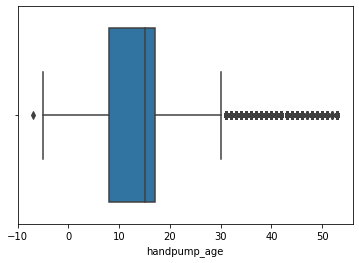

In [44]:
sns.boxplot(df_final['handpump_age'])

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


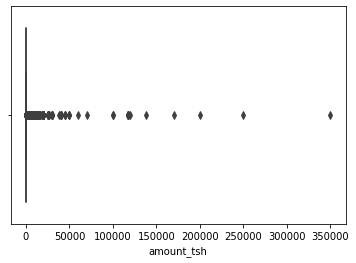

In [45]:
sns.boxplot(df_final['amount_tsh'])

In [46]:
from numpy import percentile
Q1 = df_final['amount_tsh'].quantile(0.25)

In [47]:
Q3 = df_final['amount_tsh'].quantile(0.75)

In [48]:
IQR = Q3 - Q1

In [49]:
lower_band = 0 if Q1 - 1.5*IQR <= 0 else Q1 - 1.5*IQR
upper_band = Q3 + 1.5*IQR

In [50]:
lower_band,upper_band

(0, 50.0)

In [51]:
df_final['amount_tsh'] = df_final['amount_tsh'].clip(lower = lower_band, upper = upper_band)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


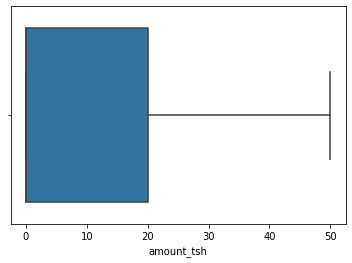

In [52]:
sns.boxplot(df_final['amount_tsh'])

### Exploratory Data Analysis

### Hypotheses to test :
* Now, since we have a clean data set, let's do some EDA
* Here are several hypotheses which we'll explore during the EDA phase :
    * The older the pump, the higher the chance of damage = being non-functional
    * The higher the population of the location, the higher the usage of the pump, thus higher the chance of damage
    * Water quality may have an impact. Salty water may lead to internal rusting of the pump hence leading to possible damage
    * The installer company may show some impact (for examples one company may manufacture inferior quality pumps compared to others)
    * Funder, Installer, Lat-Long, Source, Region may not have any impact on the defectiveness of the pump
<br><br/>
#### Let's analyze the dataset and test these hypotheses!

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

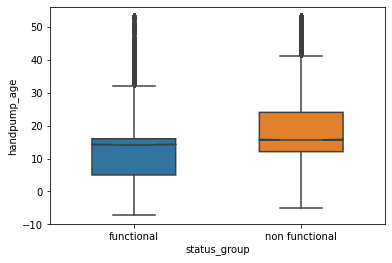

In [54]:
sns.boxplot( x=df_final["status_group"], y=df_final["handpump_age"], width = 0.5, notch = True)

We see that for the non-functional pumps, the mean age is higher. Therefore pumps which are older can lead to more damage and hence nonfunctional

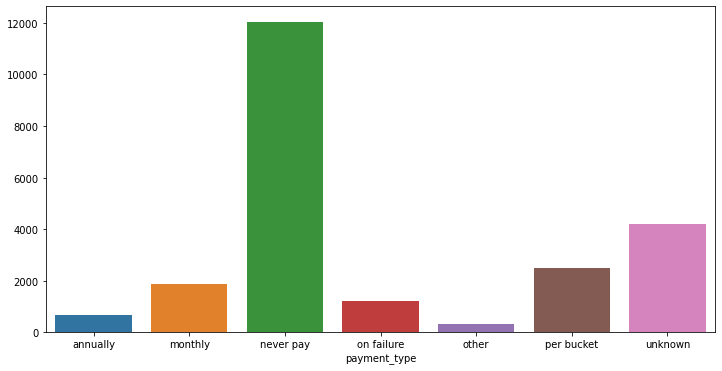

In [55]:
# visualizing defective status by payment_type
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6))
y = df_final[df_final['status_group']=='non functional'].groupby(['payment_type'])['id'].agg(np.size).values
x = df_final[df_final['status_group']=='non functional'].groupby(['payment_type'])['id'].agg(np.size).index
sns.barplot(x=x, y=y, data=df_final)

We can see that when the maintainence amt is not paid/never paid, the pumps are non functional

### Conclusion : 
* It appears that a majority of non-functional handpumps are in the payment category 'never pay'. Payment type may have an impact on the response variable.

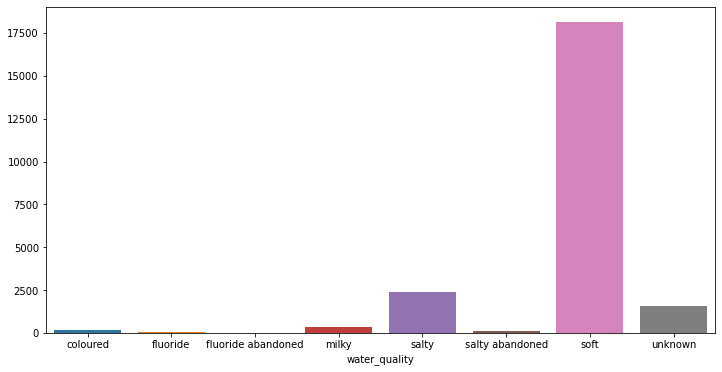

In [56]:
# visualizing defective status by water_quality
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6))
y = df_final[df_final['status_group']=='non functional'].groupby(['water_quality'])['id'].agg(np.size).values
x = df_final[df_final['status_group']=='non functional'].groupby(['water_quality'])['id'].agg(np.size).index
sns.barplot(x=x, y=y, data=df_final)

### Conclusion : 
* It appears that the majority of defective pumps are associated with "soft" water. While looking for the cause of this, I got to read the following article [here](https://curaflo.com/soft-water/). This shows quality of water can lead to corrosion of pipes in a big way

In [57]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54986 entries, 0 to 18919
Data columns (total 34 columns):
Unnamed: 0               54986 non-null int64
id                       54986 non-null int64
amount_tsh               54986 non-null float64
num_private              54986 non-null int64
basin                    54986 non-null object
region                   54986 non-null object
region_code              54986 non-null int64
district_code            54986 non-null int64
lga                      54986 non-null object
population               54986 non-null int64
public_meeting           51810 non-null object
recorded_by              54986 non-null object
scheme_management        51332 non-null object
permit                   52230 non-null object
construction_year        54986 non-null int64
extraction_type          54986 non-null object
extraction_type_group    54986 non-null object
extraction_type_class    54986 non-null object
management               54986 non-null object
mana

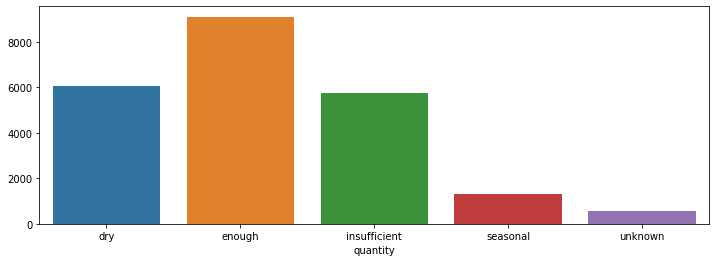

In [58]:
# visualizing defective status by quantity
from matplotlib.pyplot import figure
figure(num=None, figsize=(12,4))
y = df_final[df_final['status_group']=='non functional'].groupby(['quantity'])['id'].agg(np.size).values
x = df_final[df_final['status_group']=='non functional'].groupby(['quantity'])['id'].agg(np.size).index
sns.barplot(x=x, y=y, data=df_final)

### Conclusion : 
* Can't say conclusively whether source of water has any impact on the extent of damage to the hand pump

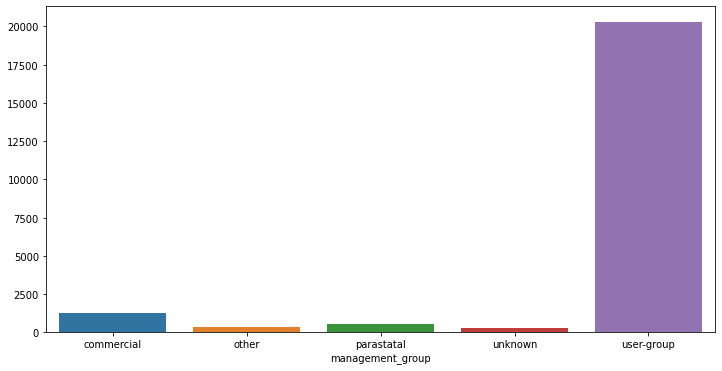

In [59]:
# visualizing defective status by management_group
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6))
y = df_final[df_final['status_group']=='non functional'].groupby(['management_group'])['id'].agg(np.size).values
x = df_final[df_final['status_group']=='non functional'].groupby(['management_group'])['id'].agg(np.size).index
sns.barplot(x=x, y=y, data=df_final)

### Conclusion : 
* It is evident that the hand pumps managed by user groups are more prone to damage (may be due to negligence)

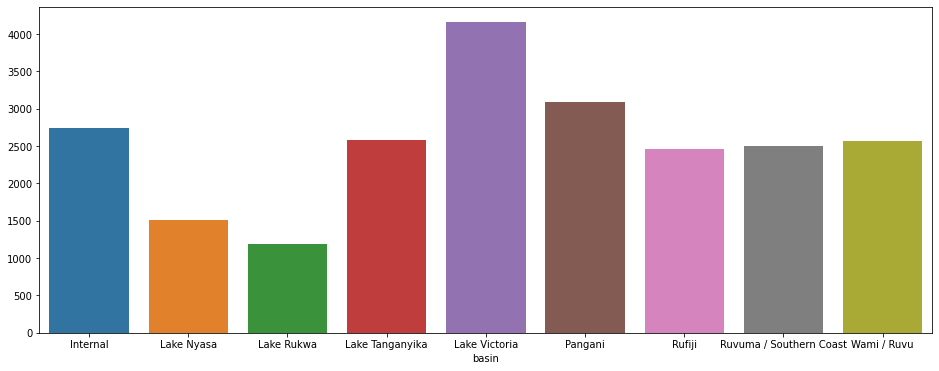

In [60]:
# visualizing defective status by payment_type
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 6))
y = df_final[df_final['status_group']=='non functional'].groupby(['basin'])['id'].agg(np.size).values
x = df_final[df_final['status_group']=='non functional'].groupby(['basin'])['id'].agg(np.size).index
sns.barplot(x=x, y=y, data=df_final)

### Conclusion : 
* It seems nothing can be said conclusively about the impact of type of basin on hand pump damage

In [61]:
df_final = df_final.drop(['num_private','lga','construction_year',
                          'extraction_type','extraction_type_group','management',
                          'source_type','quality_group','quantity_group',
                          'waterpoint_type_group','year_recorded'],axis=1)

In [62]:
# let's look at the no. of levels for each categorical variable
df_final.head()

,Unnamed: 0,id,amount_tsh,basin,region,region_code,district_code,population,public_meeting,recorded_by,...,management_group,payment,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group,handpump_age
0,0,69572,50.0,Lake Nyasa,Iringa,11,5,109,True,GeoData Consultants Ltd,...,user-group,pay annually,annually,soft,enough,spring,groundwater,communal standpipe,functional,12.0
1,1,8776,0.0,Lake Victoria,Mara,20,2,280,NaN,GeoData Consultants Ltd,...,user-group,never pay,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional,3.0
2,2,34310,25.0,Pangani,Manyara,21,4,250,True,GeoData Consultants Ltd,...,user-group,pay per bucket,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional,4.0
3,3,67743,0.0,Ruvuma / Southern Coast,Mtwara,90,63,58,True,GeoData Consultants Ltd,...,user-group,never pay,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional,27.0
5,5,9944,20.0,Pangani,Tanga,4,8,1,True,GeoData Consultants Ltd,...,user-group,pay per bucket,per bucket,salty,enough,other,unknown,communal standpipe multiple,functional,2.0


In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54986 entries, 0 to 18919
Data columns (total 23 columns):
Unnamed: 0               54986 non-null int64
id                       54986 non-null int64
amount_tsh               54986 non-null float64
basin                    54986 non-null object
region                   54986 non-null object
region_code              54986 non-null int64
district_code            54986 non-null int64
population               54986 non-null int64
public_meeting           51810 non-null object
recorded_by              54986 non-null object
scheme_management        51332 non-null object
permit                   52230 non-null object
extraction_type_class    54986 non-null object
management_group         54986 non-null object
payment                  54986 non-null object
payment_type             54986 non-null object
water_quality            54986 non-null object
quantity                 54986 non-null object
source                   54986 non-null object
so

In [64]:
final_feat_cols = df_final.select_dtypes(include=['object']).columns

In [65]:
final_feat_cols

Index(['basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management',
       'permit', 'extraction_type_class', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quantity', 'source', 'source_class',
       'waterpoint_type', 'status_group'],
      dtype='object')

### Next Step

With some of understanding of the potential factors leading to defective pumps, let's get into the actual modelling

In [66]:
# let's split the train data further into features and labels
df_final['status_group'] = df_final['status_group'].map({'non functional': 1, 'functional': 0})

 other feature columns which have missing values replace it with dummy values

In [67]:
df_final[final_feat_cols] = df_final[final_feat_cols].fillna('N/A')

In [68]:
df_final['public_meeting'] = df_final['public_meeting'].map({'True': 1, 'False': 0, 'N/A': 0})
df_final['permit'] = df_final['permit'].map({'True': 1, 'False': 0, 'N/A': 0})

 filling missing values is essential and should be done before encoding categorical features. 

In [69]:
# label encoding categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_final = df_final.apply(LabelEncoder().fit_transform)

In [70]:
df_final.head(10)

,Unnamed: 0,id,amount_tsh,basin,region,region_code,district_code,population,public_meeting,recorded_by,...,management_group,payment,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group,handpump_age
0,0,51481,19,1,3,10,4,109,2034,0,...,4,2,0,6,1,8,0,1,0,21
1,1,6510,0,4,9,19,1,275,0,0,...,4,0,2,6,2,5,1,1,0,9
2,2,25457,13,5,8,20,3,246,34046,0,...,4,4,5,6,1,0,1,2,0,10
3,3,50098,0,7,12,25,15,58,34047,0,...,4,0,2,6,0,3,0,2,1,49
5,5,7379,12,5,20,3,7,1,34048,0,...,4,4,5,4,1,4,2,2,0,8
10,10,36339,0,8,14,23,12,337,34049,0,...,0,0,2,4,1,3,0,6,0,6
11,11,37335,19,1,16,9,4,246,34050,0,...,4,5,3,6,2,7,0,4,0,48
13,13,37404,0,5,6,2,6,1,34051,0,...,4,3,1,6,1,8,0,1,0,10
15,15,45736,0,3,15,14,1,196,34052,0,...,4,0,2,6,1,3,0,4,0,41
16,16,35900,19,6,3,10,3,35,34053,0,...,4,3,1,6,0,6,1,1,1,55


In [71]:
df_final.isnull().sum().sort_values(ascending = False)

handpump_age             0
scheme_management        0
id                       0
amount_tsh               0
basin                    0
region                   0
region_code              0
district_code            0
population               0
public_meeting           0
recorded_by              0
permit                   0
status_group             0
extraction_type_class    0
management_group         0
payment                  0
payment_type             0
water_quality            0
quantity                 0
source                   0
source_class             0
waterpoint_type          0
Unnamed: 0               0
dtype: int64

In [72]:
# splitting the feature and response variables
X = df_final.loc[:,df_final.columns != 'status_group']
y = df_final['status_group']

In [73]:
# creating the train test split usually
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [74]:
X_train.columns

Index(['Unnamed: 0', 'id', 'amount_tsh', 'basin', 'region', 'region_code',
       'district_code', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'extraction_type_class',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quantity', 'source', 'source_class', 'waterpoint_type',
       'handpump_age'],
      dtype='object')

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

In [76]:
# Instantiate
model = RandomForestClassifier()

In [77]:
# Fit or train
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
# Predict the yvalue
y_pred = model.predict(X_test)

In [79]:
# Evaluate
print("The accuracy score of RandomForestClassifier model is %s" %(accuracy_score(y_test, y_pred)))
print("The fbeta score of RandomForestClassifier model is %s" %(fbeta_score(y_test, y_pred, beta = 1)))

The accuracy score of RandomForestClassifier model is 0.8295344325897187
The fbeta score of RandomForestClassifier model is 0.7797274009086637


In [ ]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,ShuffleSplit

In [ ]:
# we are going to improve the base model
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)

    # Create a random forest classifier object
    model = RandomForestClassifier()

    # Create a dictionary for the parameters 'max_depth',min_samples_split and min_samples_leaf
    params = {'max_depth':range(2,12,2),
              'min_samples_split':range(2,12,2),
              'min_samples_leaf':range(2,12,2)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(fbeta_score, beta = 1)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(model, params, scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [ ]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)
reg.score

# Produce the values for 'max_depth',min_samples_split and min_samples_leaf
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))
print("Parameter 'min_samples_split' is {} for the optimal model.".format(reg.get_params()['min_samples_split']))
print("Parameter 'min_samples_leaf' is {} for the optimal model.".format(reg.get_params()['min_samples_leaf']))

In [ ]:
# applying best parameter values to RandomForestClassfier
rf_clf = RandomForestClassifier(max_depth = 10, min_samples_split = 8, min_samples_leaf = 2)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print("The accuracy score of tuned RandomForestClassifier model is %s" %(accuracy_score(y_test,y_pred)))
print("The fbeta score of tuned RandomForestClassifier model is %s" %(fbeta_score(y_test,y_pred,beta = 1)))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
# exhibiting feature importance
features = X.columns
importances = rf_clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
df_final.to_csv('clean_handpump_data.csv',index=False)

### Boosting algorithm - please refer to the link where you will find a demonstration of the catboost algorithm 

https://github.com/eaglewarrior/Data-analysis-python-projects/blob/master/Hanpump_data_classification.ipynb

In [80]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(100, 20) (100,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data)
